## EDA

In [48]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [49]:
df = pd.read_csv('../data/mobile_data.csv')
df.head()

,Name,Brand,Battery capacity,Screen size,Touchscreen,Resolution,Processor,RAM,Internal storage,Camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,4085 mAh,7 inch,Yes,1440 x 3120 px,8,12000 mb,256 GB,48 MP Rear + 16 MP Front Camera,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,4000 mAh,7 inch,Yes,1080 x 2400 px,8,6000 mb,64 GB,64 MP Rear + 16 MP Front Camera,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,iPhone 11 Pro Max,Apple,3969 mAh,7 inch,Yes,1242 x 2688 px,6,4000 mb,64 GB,12 MP Rear + 12 MP Front Camera,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,iPhone 11,Apple,3110 mAh,6 inch,Yes,828 x 1792 px,6,4000 mb,64 GB,12 MP Rear + 12 MP Front Camera,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG G8X ThinQ,LG,4000 mAh,6 inch,Yes,1080 x 2340 px,8,6000 mb,128 GB,12 MP Rear + 32 MP Front Camera,Android,Yes,Yes,Yes,1,No,No,49990


In [50]:
df.shape

(1359, 18)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              1359 non-null   object
 1   Brand             1359 non-null   object
 2   Battery capacity  1359 non-null   object
 3   Screen size       1359 non-null   object
 4   Touchscreen       1359 non-null   object
 5   Resolution        1359 non-null   object
 6   Processor         1359 non-null   int64 
 7   RAM               1359 non-null   object
 8   Internal storage  1359 non-null   object
 9   Camera            1359 non-null   object
 10  Operating system  1359 non-null   object
 11  Wi-Fi             1359 non-null   object
 12  Bluetooth         1359 non-null   object
 13  GPS               1359 non-null   object
 14  Number of SIMs    1359 non-null   int64 
 15  3G                1359 non-null   object
 16  4G/ LTE           1359 non-null   object
 17  Price         

In [52]:
df.describe()

,Processor,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000
mean,5.551141,1.833701,11465.825607
std,2.196562,0.374457,13857.497077
min,1.000000,1.000000,494.000000
25%,4.000000,2.000000,4763.500000
50%,4.000000,2.000000,6999.000000
75%,8.000000,2.000000,11999.000000
max,10.000000,3.000000,174990.000000


In [53]:
df.columns

Index(['Name', 'Brand', 'Battery capacity', 'Screen size', 'Touchscreen',
       'Resolution', 'Processor', 'RAM', 'Internal storage', 'Camera',
       'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS', 'Number of SIMs', '3G',
       '4G/ LTE', 'Price'],
      dtype='object')

In [54]:
col = df.select_dtypes('object').columns
for i in col:
    print('Unique values in column "{}": {}'.format(i, df[i].nunique()))
    print('----------------------------------------------------------')
    print('Value counts: "{}" \n{}'.format(i,df[i].value_counts()))
    print('----------------------------------------------------------')

Unique values in column "Name": 1359
----------------------------------------------------------
Value counts: "Name" 
Name
iBall Andi Avonte 5               1
OnePlus 7T Pro McLaren Edition    1
Realme X2 Pro                     1
iPhone 11 Pro Max                 1
iPhone 11                         1
                                 ..
Huawei Mate 20 Pro                1
LG V40 ThinQ                      1
OnePlus 6T                        1
Apple iPhone XR                   1
Apple iPhone XS Max               1
Name: count, Length: 1359, dtype: int64
----------------------------------------------------------
Unique values in column "Brand": 76
----------------------------------------------------------
Value counts: "Brand" 
Brand
Intex        117
Samsung      101
Micromax      71
Lava          59
Panasonic     55
            ... 
Sansui         1
TCL            1
Zuk            1
HP             1
Philips        1
Name: count, Length: 76, dtype: int64
---------------------------------

In [55]:
df['Brand'].unique()

array(['OnePlus', 'Realme', 'Apple', 'LG', 'Samsung', 'Asus', 'Xiaomi',
       'Oppo', 'Huawei', 'Google', 'Nokia', 'HTC', 'Motorola', 'Honor',
       'Yu', 'Poco', 'Vivo', 'Nubia', 'Black Shark', 'Infinix', 'Lenovo',
       'Sony', 'Jio', 'Coolpad', 'Micromax', 'Smartron', 'LeEco',
       'BlackBerry', 'Gionee', 'Meizu', 'Panasonic', 'Tecno', 'InFocus',
       'Itel', '10.or', 'Lava', 'Cat', 'Lyf', 'Intex', 'Xolo', 'Acer',
       'Phicomm', 'Karbonn', 'Spice', 'iVoomi', 'Kult', 'Nuu Mobile',
       'Ziox', 'Zopo', 'ZTE', 'Onida', 'Microsoft', 'iBall', 'Mobiistar',
       'Comio', 'Videocon', 'Alcatel', 'Reach', 'Zen', 'Tambo', 'Razer',
       'Homtom', 'Lephone', 'Aqua', 'Celkon', 'Jivi', 'Billion', 'Swipe',
       'M-tech', 'Sansui', 'Zuk', 'TCL', 'mPhone', 'Blu', 'HP', 'Philips'],
      dtype=object)

In [56]:
df.isnull().sum()

Name                0
Brand               0
Battery capacity    0
Screen size         0
Touchscreen         0
Resolution          0
Processor           0
RAM                 0
Internal storage    0
Camera              0
Operating system    0
Wi-Fi               0
Bluetooth           0
GPS                 0
Number of SIMs      0
3G                  0
4G/ LTE             0
Price               0
dtype: int64

In [57]:
# Filling missing values with the mode of the respective column
null_cols = df.columns[df.isnull().any()]
for i in null_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [58]:
df.isnull().sum()

Name                0
Brand               0
Battery capacity    0
Screen size         0
Touchscreen         0
Resolution          0
Processor           0
RAM                 0
Internal storage    0
Camera              0
Operating system    0
Wi-Fi               0
Bluetooth           0
GPS                 0
Number of SIMs      0
3G                  0
4G/ LTE             0
Price               0
dtype: int64

In [59]:
df.columns = df.columns.str.strip()

In [60]:
# Getting the values of categorical columns and changing their data types where necessary and changing column names with their appropriate measurements
cols = ['Battery capacity', 'Screen size', 'RAM', 'Internal storage']

for i in cols:
    df[i] = df[i].astype('str').str.extract('(\d+)').astype(int)

df.rename(columns={
    'Battery capacity': 'Battery_capacity(mAh)',
    'Screen size': 'Screen_size(inches)',
    'RAM': 'RAM(mb)',
    'Internal storage': 'Internal_storage(GB)',
}, inplace=True)

In [61]:
df.isnull().sum()

Name                     0
Brand                    0
Battery_capacity(mAh)    0
Screen_size(inches)      0
Touchscreen              0
Resolution               0
Processor                0
RAM(mb)                  0
Internal_storage(GB)     0
Camera                   0
Operating system         0
Wi-Fi                    0
Bluetooth                0
GPS                      0
Number of SIMs           0
3G                       0
4G/ LTE                  0
Price                    0
dtype: int64

In [62]:
# Getting the resolution of the screen in terms of width and height and creating a new columns
# Extracting front and rear camera specifications
# Changing the Ram units to GB
df[['Resolution_width(px)', 'Resolution_height(px)']] = df['Resolution'].astype('str').str.replace('px','').str.split('x', expand=True).astype(int)
df[['Rear_Camera(MP)', 'Front_Camera(MP)']] = df['Camera'].astype('str').str.replace('MP Rear','').str.replace('MP Front Camera','').str.strip().str.split('+', expand=True).astype(float).astype(int)
df['RAM(mb)'] = round(df['RAM(mb)'] / 1024).astype(int)
df.rename(columns={
    'RAM(mb)': 'RAM(GB)'
}, inplace=True)
df.drop(columns=['Resolution', 'Camera'], axis=1, inplace=True)

In [63]:
df.head()

,Name,Brand,Battery_capacity(mAh),Screen_size(inches),Touchscreen,Processor,RAM(GB),Internal_storage(GB),Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,Resolution_width(px),Resolution_height(px),Rear_Camera(MP),Front_Camera(MP)
0,OnePlus 7T Pro McLaren Edition,OnePlus,4085,7,Yes,8,12,256,Android,Yes,Yes,Yes,2,Yes,Yes,58998,1440,3120,48,16
1,Realme X2 Pro,Realme,4000,7,Yes,8,6,64,Android,Yes,Yes,Yes,2,Yes,Yes,27999,1080,2400,64,16
2,iPhone 11 Pro Max,Apple,3969,7,Yes,6,4,64,iOS,Yes,Yes,Yes,2,Yes,Yes,106900,1242,2688,12,12
3,iPhone 11,Apple,3110,6,Yes,6,4,64,iOS,Yes,Yes,Yes,2,Yes,Yes,62900,828,1792,12,12
4,LG G8X ThinQ,LG,4000,6,Yes,8,6,128,Android,Yes,Yes,Yes,1,No,No,49990,1080,2340,12,32


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   1359 non-null   object
 1   Brand                  1359 non-null   object
 2   Battery_capacity(mAh)  1359 non-null   int64 
 3   Screen_size(inches)    1359 non-null   int64 
 4   Touchscreen            1359 non-null   object
 5   Processor              1359 non-null   int64 
 6   RAM(GB)                1359 non-null   int64 
 7   Internal_storage(GB)   1359 non-null   int64 
 8   Operating system       1359 non-null   object
 9   Wi-Fi                  1359 non-null   object
 10  Bluetooth              1359 non-null   object
 11  GPS                    1359 non-null   object
 12  Number of SIMs         1359 non-null   int64 
 13  3G                     1359 non-null   object
 14  4G/ LTE                1359 non-null   object
 15  Price                

In [65]:
df.to_csv('../data/cleaned_mobile_data_prices.csv', index=False)

In [66]:
df.describe()

,Battery_capacity(mAh),Screen_size(inches),Processor,RAM(GB),Internal_storage(GB),Number of SIMs,Price,Resolution_width(px),Resolution_height(px),Rear_Camera(MP),Front_Camera(MP)
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,2938.489330,5.398823,5.551141,2.459897,30.657837,1.833701,11465.825607,811.543046,1490.777778,12.061810,7.005151
std,873.514133,0.707543,2.196562,1.702801,36.947839,0.374457,13857.497077,270.707271,557.780120,8.947845,6.327871
min,1010.000000,2.000000,1.000000,0.000000,0.000000,1.000000,494.000000,240.000000,320.000000,0.000000,0.000000
25%,2300.000000,5.000000,4.000000,1.000000,8.000000,2.000000,4763.500000,720.000000,1280.000000,8.000000,2.000000
50%,3000.000000,5.000000,4.000000,2.000000,16.000000,2.000000,6999.000000,720.000000,1280.000000,12.000000,5.000000
75%,3500.000000,6.000000,8.000000,3.000000,32.000000,2.000000,11999.000000,1080.000000,1920.000000,13.000000,8.000000
max,6000.000000,7.000000,10.000000,12.000000,512.000000,3.000000,174990.000000,2160.000000,3840.000000,108.000000,48.000000


In [67]:
numerical_features = df.select_dtypes(exclude=['object']).columns
categorical_features = df.select_dtypes(include=['object']).columns

<Axes: >

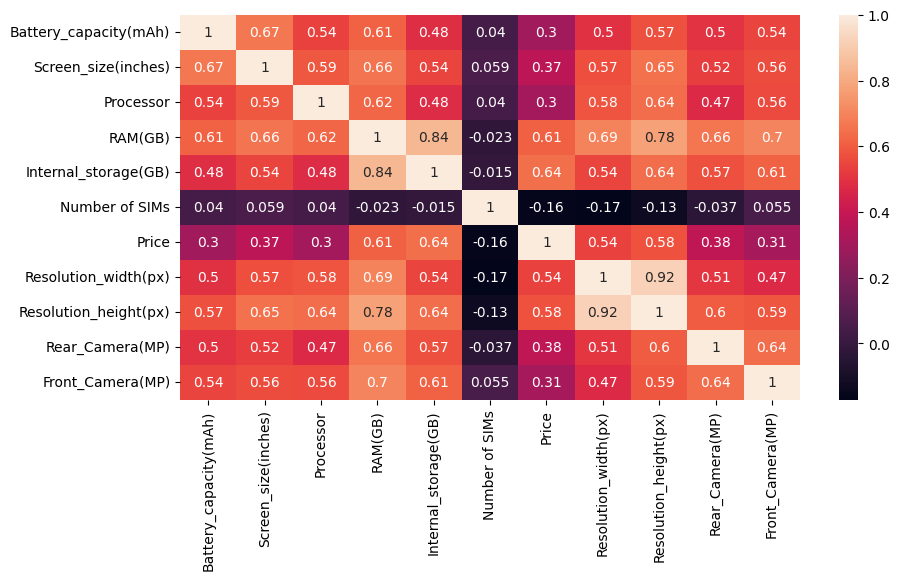

In [68]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True)

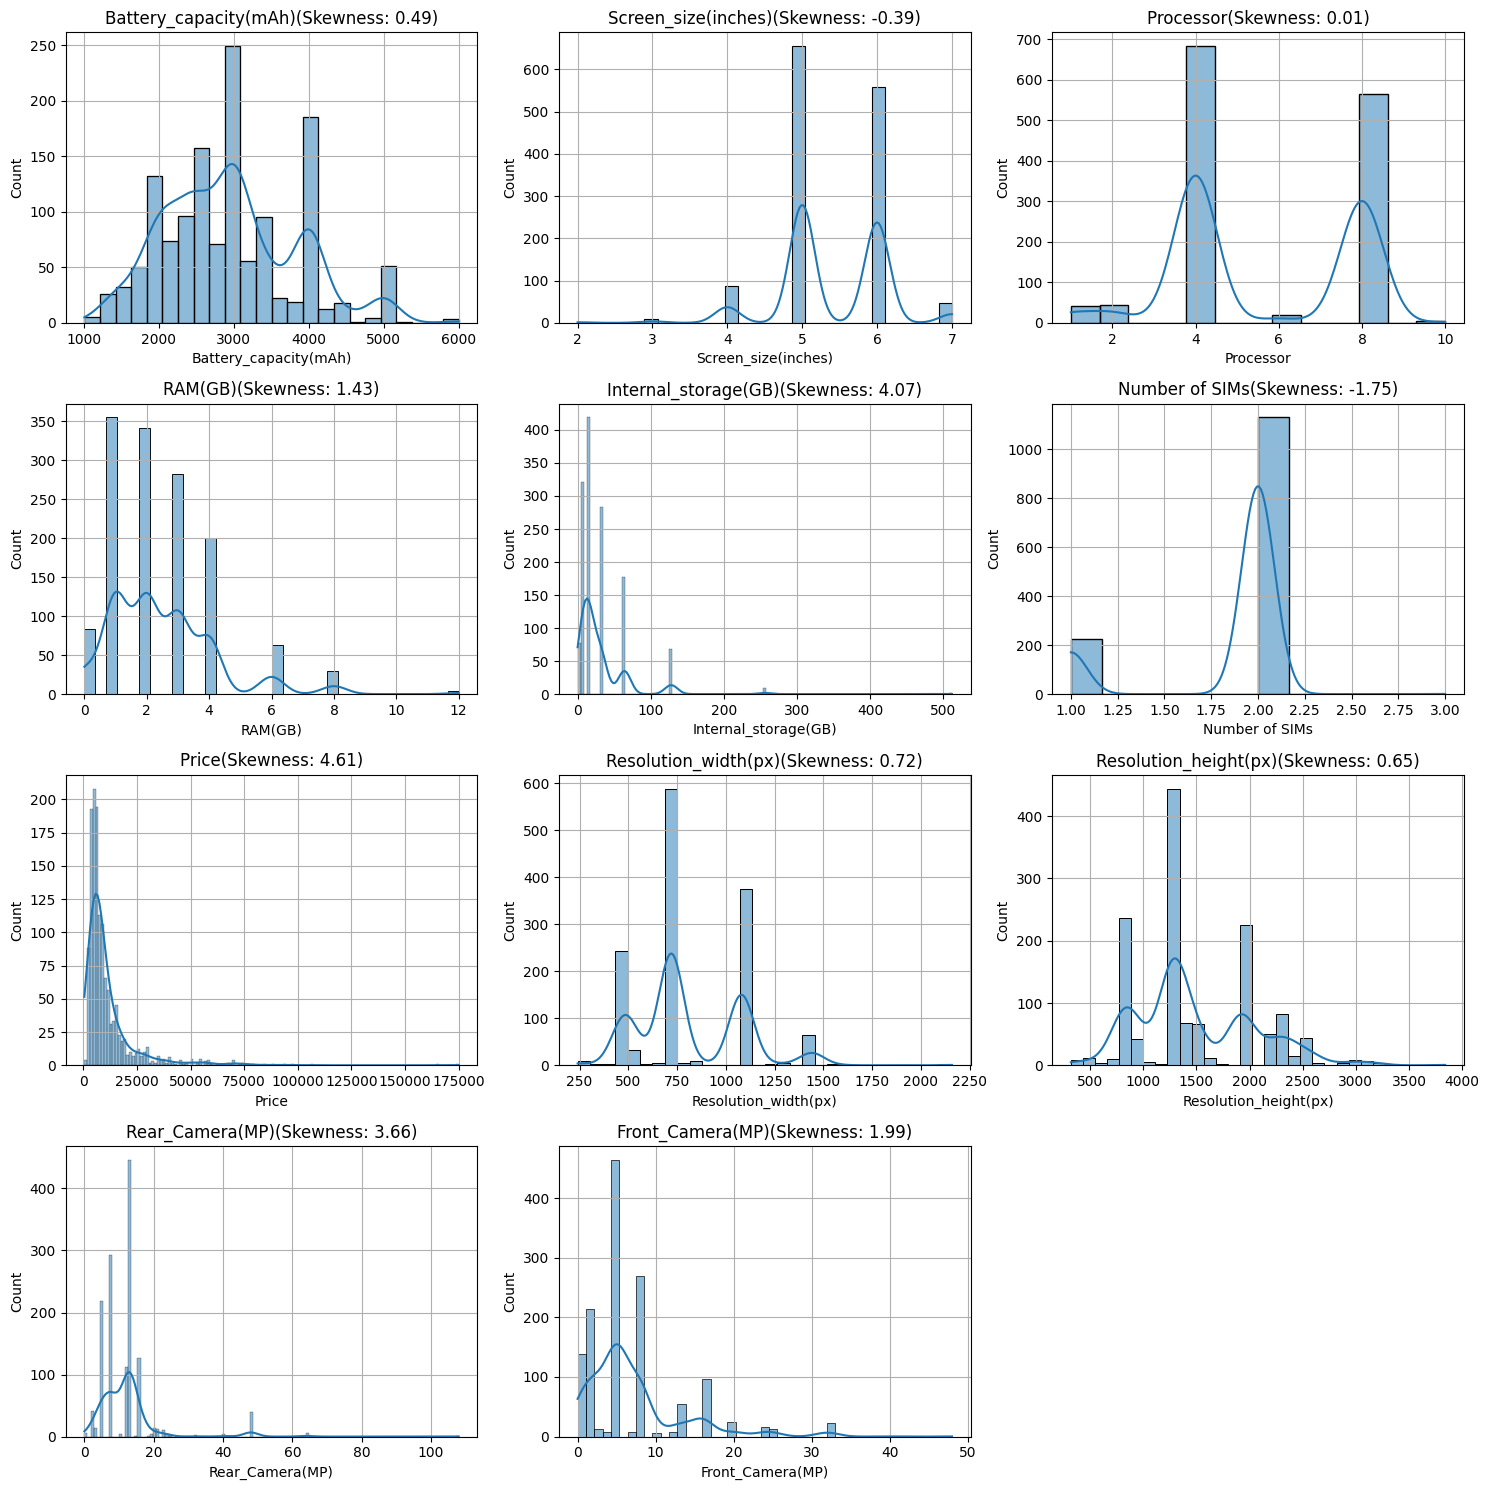

In [69]:
def plot_histogram(df, cols):
    plt.figure(figsize=(15, 15))
    for i, column in enumerate(cols, 1):
        plt.subplot(4, 3, i)
        sns.histplot(df[column], kde=True)
        skewness = df[column].skew()
        plt.grid(True)
        plt.title(f'{column}(Skewness: {skewness:.2f})')
        plt.xlabel(column)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_histogram(df, numerical_features)

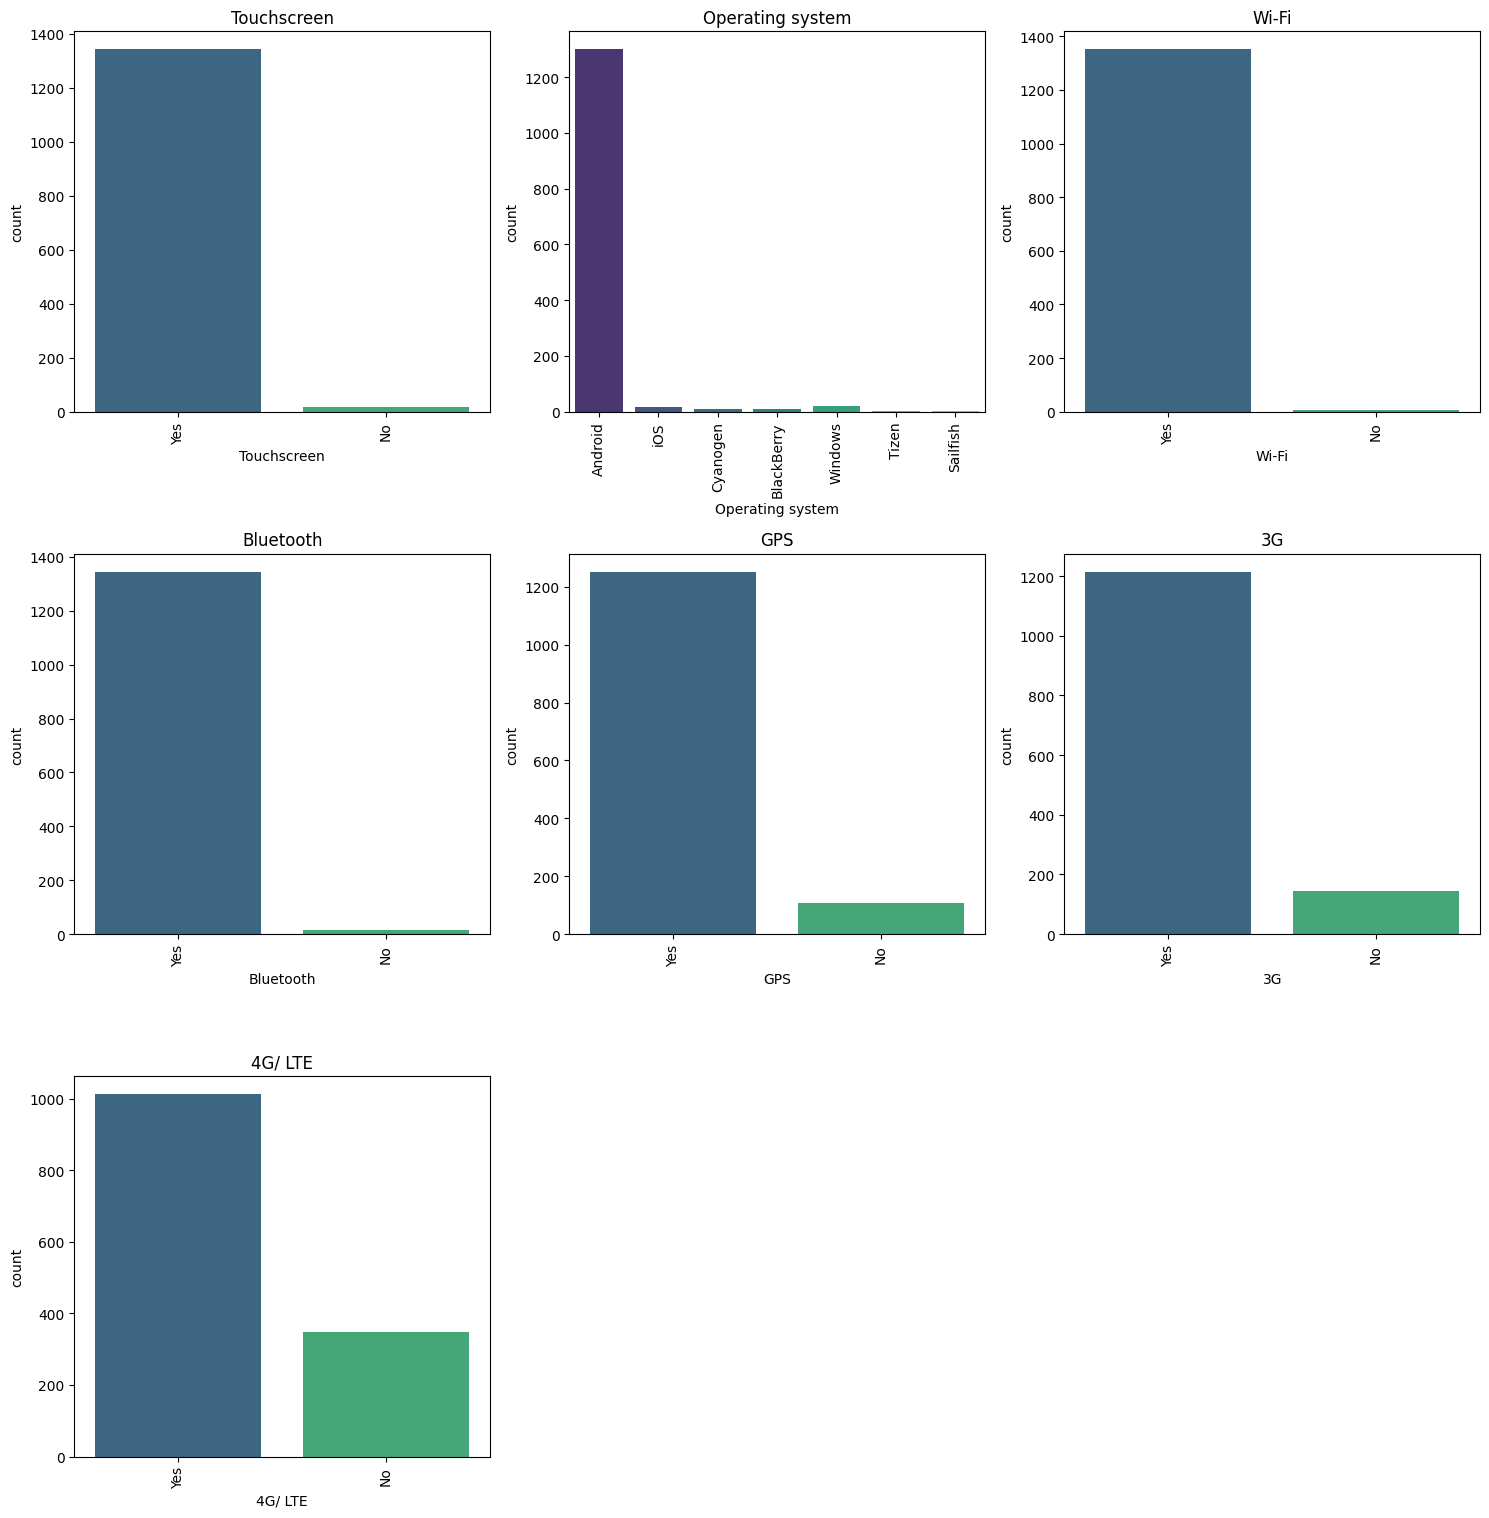

In [70]:
def plot_barplot(df, cols):
    plt.figure(figsize=(15, 20))
    cols = [col for col in cols if col not in ['Name', 'Brand']]
    for i, column in enumerate(cols, 1):
        plt.subplot(4, 3, i)
        sns.countplot(x=column, data=df, palette='viridis')
        plt.title(column)
        plt.xlabel(column)
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_barplot(df, categorical_features)


In [71]:

fig = px.histogram(df['Brand'], title='Mobile Brands')
fig.show()

In [72]:

fig = px.box(df, x='Brand', y='Price', color='Brand', title='Price Distribution by Brand', width=1500, height=500)
fig.show()

In [73]:
categorical_features

Index(['Name', 'Brand', 'Touchscreen', 'Operating system', 'Wi-Fi',
       'Bluetooth', 'GPS', '3G', '4G/ LTE'],
      dtype='object')

<Axes: xlabel='Touchscreen', ylabel='Price'>

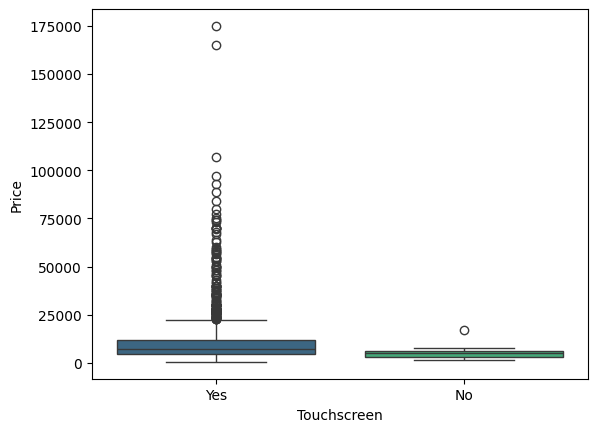

In [74]:
sns.boxplot(x='Touchscreen', y='Price', data=df, palette='viridis')


In [75]:
categorical_features

Index(['Name', 'Brand', 'Touchscreen', 'Operating system', 'Wi-Fi',
       'Bluetooth', 'GPS', '3G', '4G/ LTE'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

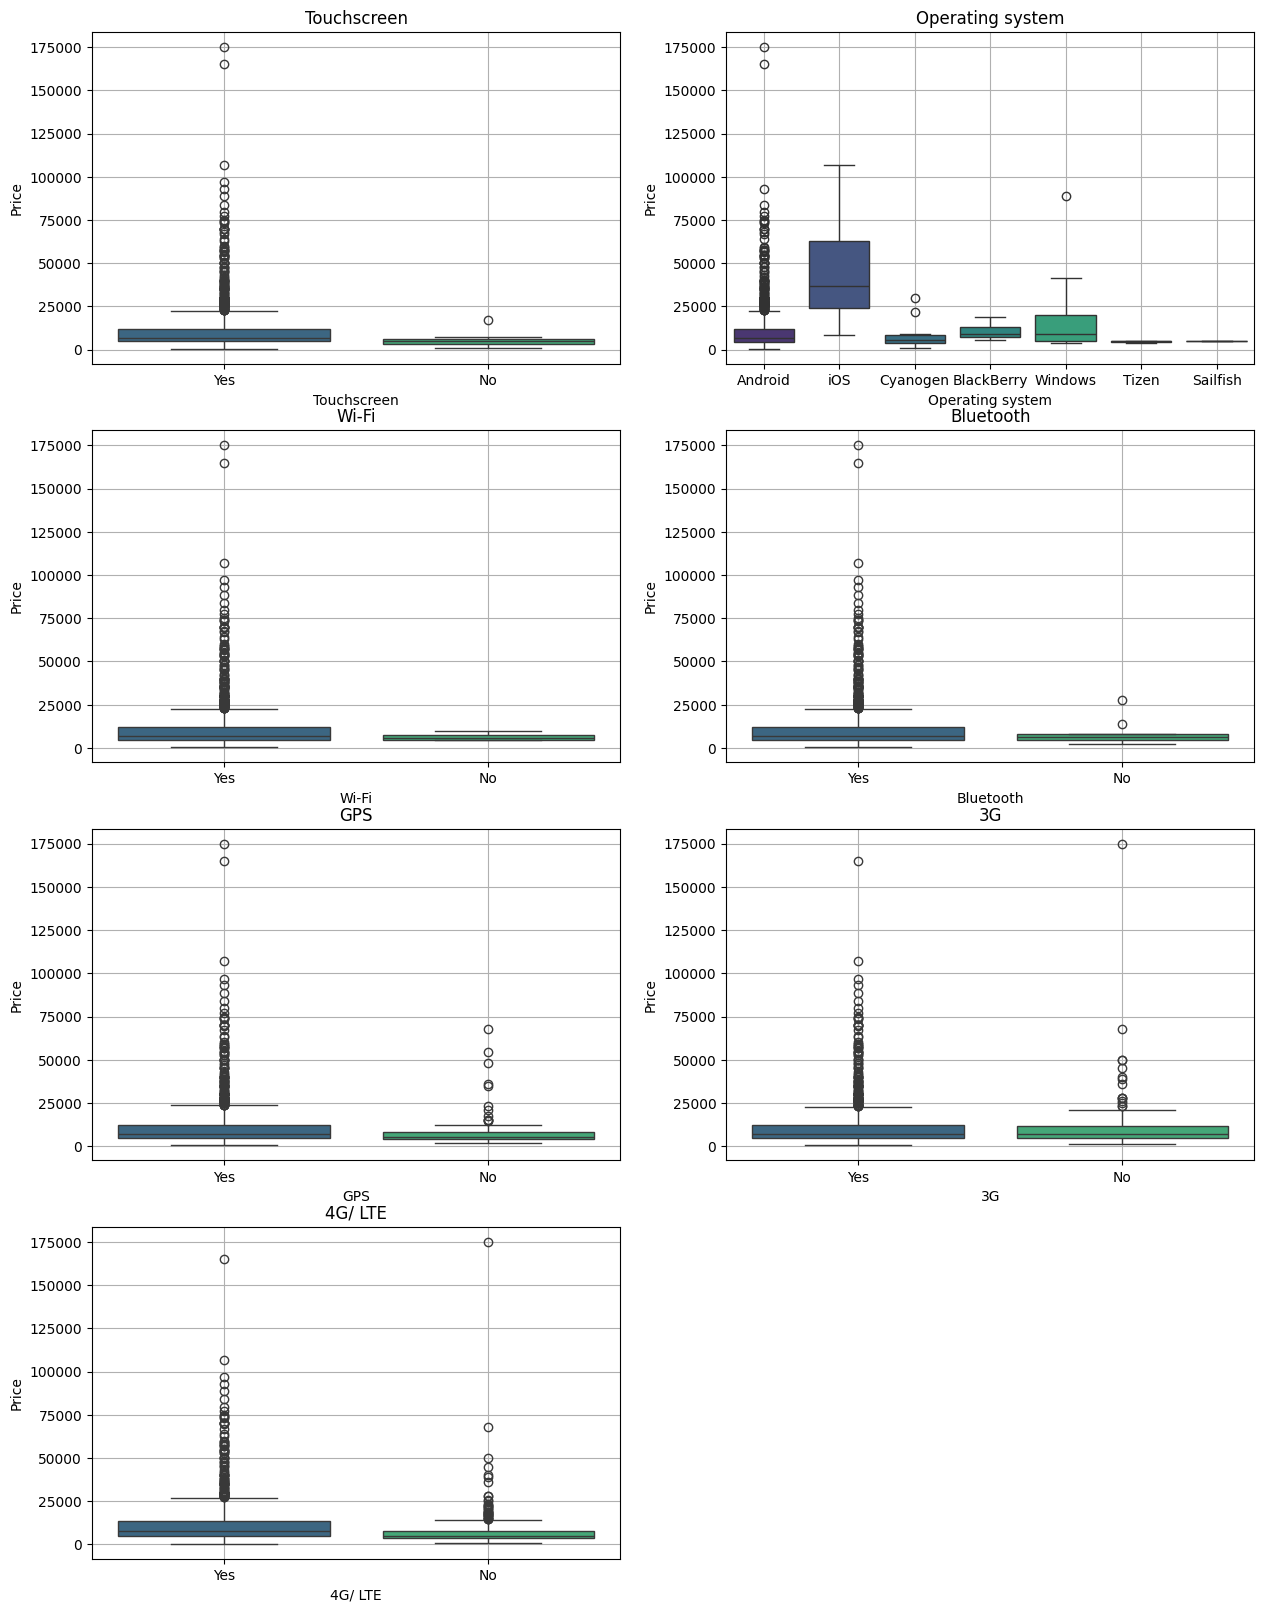

In [76]:
cols = ['Touchscreen', 'Operating system', 'Wi-Fi',
       'Bluetooth', 'GPS', '3G', '4G/ LTE']
def plot_boxplot(df,cols):
    plt.figure(figsize=(15,25))
    for i, column in enumerate(cols,1):
        plt.subplot(5,2,i)
        sns.boxplot(x=column, y='Price', data=df, palette='viridis')
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.grid(True)

plt.tight_layout()
plt.show()

plot_boxplot(df, cols)

In [77]:
df.head()

,Name,Brand,Battery_capacity(mAh),Screen_size(inches),Touchscreen,Processor,RAM(GB),Internal_storage(GB),Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,Resolution_width(px),Resolution_height(px),Rear_Camera(MP),Front_Camera(MP)
0,OnePlus 7T Pro McLaren Edition,OnePlus,4085,7,Yes,8,12,256,Android,Yes,Yes,Yes,2,Yes,Yes,58998,1440,3120,48,16
1,Realme X2 Pro,Realme,4000,7,Yes,8,6,64,Android,Yes,Yes,Yes,2,Yes,Yes,27999,1080,2400,64,16
2,iPhone 11 Pro Max,Apple,3969,7,Yes,6,4,64,iOS,Yes,Yes,Yes,2,Yes,Yes,106900,1242,2688,12,12
3,iPhone 11,Apple,3110,6,Yes,6,4,64,iOS,Yes,Yes,Yes,2,Yes,Yes,62900,828,1792,12,12
4,LG G8X ThinQ,LG,4000,6,Yes,8,6,128,Android,Yes,Yes,Yes,1,No,No,49990,1080,2340,12,32


<Figure size 640x480 with 0 Axes>

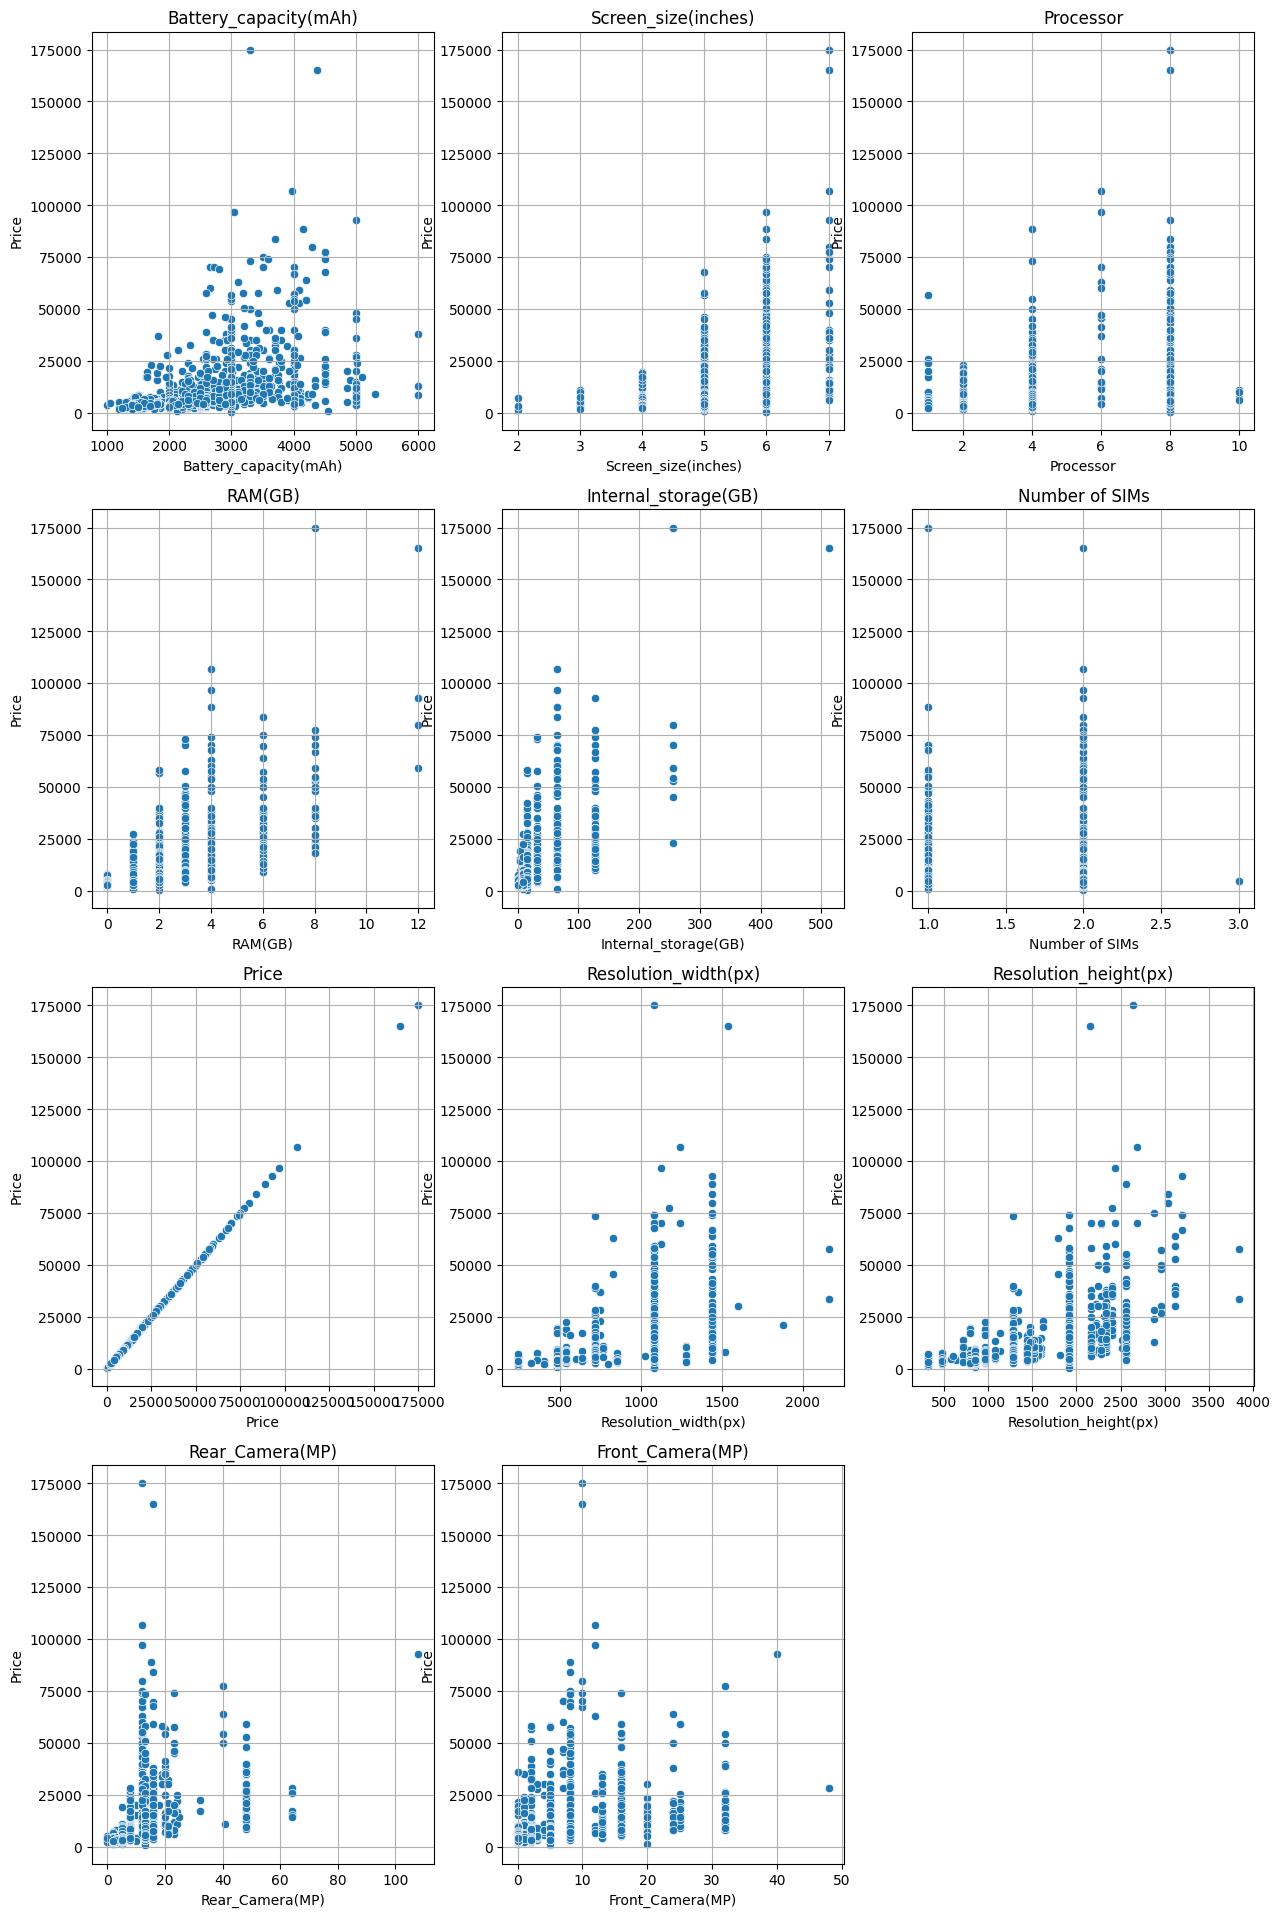

In [78]:
def plot_boxplot(df,cols):
    plt.figure(figsize=(15,30))
    for i, column in enumerate(cols,1):
        plt.subplot(5,3,i)
        sns.scatterplot(x=column, y='Price', data=df)
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.grid(True)

plt.tight_layout()
plt.show()

plot_boxplot(df, numerical_features)


#### Top 5 expensive mobiles

In [80]:
df_sorted = df.sort_values(by='Price', ascending=False)

df_sorted.head().T.reset_index()


,index,617,651,2,630,614
0,Name,Samsung Galaxy Z Flip,Samsung Galaxy Fold,iPhone 11 Pro Max,iPhone 11 Pro,Samsung Galaxy S20 Ultra
1,Brand,Samsung,Samsung,Apple,Apple,Samsung
2,Battery_capacity(mAh),3300,4380,3969,3046,5000
3,Screen_size(inches),7,7,7,6,7
4,Touchscreen,Yes,Yes,Yes,Yes,Yes
5,Processor,8,8,6,6,8
6,RAM(GB),8,12,4,4,12
7,Internal_storage(GB),256,512,64,64,128
8,Operating system,Android,Android,iOS,iOS,Android
9,Wi-Fi,Yes,Yes,Yes,Yes,Yes


#### Top 5 cheapest mobiles

In [81]:
df_sorted.tail().T.reset_index()

,index,1166,153,1225,343,1101
0,Name,Lava A52,Jio Phone,LG K7,Gionee A1 Plus,Lyf Water 7
1,Brand,Lava,Jio,LG,Gionee,Lyf
2,Battery_capacity(mAh),1200,2000,2125,4550,3000
3,Screen_size(inches),4,2,5,6,6
4,Touchscreen,Yes,No,Yes,Yes,Yes
5,Processor,2,2,4,8,8
6,RAM(GB),0,0,1,4,2
7,Internal_storage(GB),4,4,8,64,16
8,Operating system,Android,Cyanogen,Android,Android,Android
9,Wi-Fi,Yes,Yes,Yes,Yes,Yes
